In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN

2023-10-10 22:24:27.889867: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-10 22:24:28.285206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-10 22:24:28.285264: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-10 22:24:28.285330: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-10 22:24:28.318266: I tensorflow/core/platform/cpu_feature_g

##### GENERATING DATA

In [12]:
def generate_seq(x,y,p,n):
    input_seq = []
    for _ in range(n):
        seq = np.sort(np.random.randint(1,p,p-1))
        seq = np.array([x] + [np.eye(p+1)[i-1] for i in seq] + [x])
        input_seq.append(seq)
    for _ in range(n):
        seq = np.sort(np.random.randint(1,p,p-1))
        seq = np.array([y] + [np.eye(p+1)[i-1] for i in seq] + [y])
        input_seq.append(seq)
    return np.array(input_seq)

In [17]:
p = 100
x = np.eye(p+1)[p-1]
y = np.eye(p+1)[p]

input_seq = generate_seq(x,y,p,1000)
np.random.shuffle(input_seq)
X = input_seq[:,:-1,:]
Y = input_seq[:,-1,:]
test_seq = generate_seq(x,y,p,100)
np.random.shuffle(test_seq)
X_test = test_seq[:,:-1,:]
Y_test = test_seq[:,-1,:]

##### RNN MODEL

Epoch 1/100
100/100 [==============================] - 4s 24ms/step - loss: 1.7297 - accuracy: 0.4455 - val_loss: 0.7376 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 2s 23ms/step - loss: 0.7173 - accuracy: 0.5040 - val_loss: 0.7069 - val_accuracy: 0.5150
Epoch 3/100
100/100 [==============================] - 2s 18ms/step - loss: 0.7048 - accuracy: 0.4950 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 4/100
100/100 [==============================] - 2s 21ms/step - loss: 0.7008 - accuracy: 0.5060 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 2s 18ms/step - loss: 0.6989 - accuracy: 0.4960 - val_loss: 0.6962 - val_accuracy: 0.5250
Epoch 6/100
100/100 [==============================] - 2s 16ms/step - loss: 0.6992 - accuracy: 0.4935 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 2s 18ms/step - loss: 0.6972 - accuracy: 0.5050 - val_loss: 0.6955 - val_accuracy:

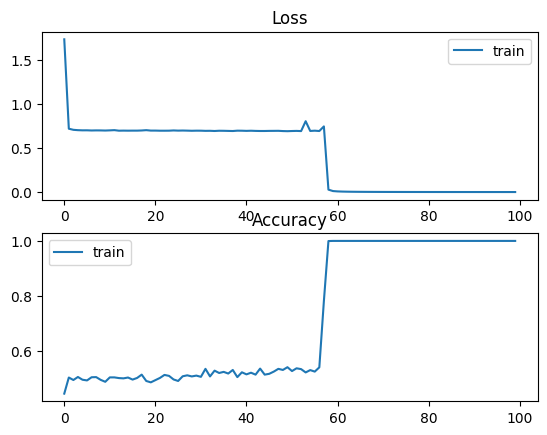

In [4]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50, input_shape=(p, p+1)))
RNN_model.add(Dense(p+1, activation='softmax'))
RNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_model.fit(X, Y,20, epochs=100, validation_data=(X_test, Y_test), verbose=1)
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(RNN_model.history.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(RNN_model.history.history['accuracy'], label='train')
plt.legend()
plt.show()

##### LSTM MODEL

Epoch 1/100
100/100 [==============================] - 4s 27ms/step - loss: 1.8456 - accuracy: 0.4680 - val_loss: 0.7184 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 2s 23ms/step - loss: 0.7093 - accuracy: 0.5035 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 2s 24ms/step - loss: 0.7024 - accuracy: 0.5120 - val_loss: 0.6984 - val_accuracy: 0.4900
Epoch 4/100
100/100 [==============================] - 3s 25ms/step - loss: 0.6989 - accuracy: 0.5045 - val_loss: 0.6966 - val_accuracy: 0.5450
Epoch 5/100
100/100 [==============================] - 2s 25ms/step - loss: 0.7004 - accuracy: 0.5045 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 6/100
100/100 [==============================] - 2s 22ms/step - loss: 0.7015 - accuracy: 0.4810 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 2s 21ms/step - loss: 0.6966 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy:

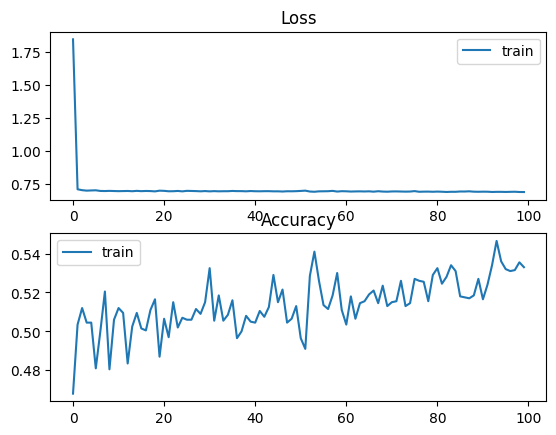

In [5]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, input_shape=(p, p+1)))
LSTM_model.add(Dense(p+1, activation='softmax'))
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model.fit(X, Y,20, epochs=100, validation_data=(X_test, Y_test), verbose=1)
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(LSTM_model.history.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(LSTM_model.history.history['accuracy'], label='train')
plt.legend()
plt.show()

In [6]:
RNN_wrong_pred= []
LSTM_wrong_pred = []
for i in range(10):
    test_seq = generate_seq(x,y,p,1500)
    np.random.shuffle(test_seq)
    X_test1 = test_seq[:,:-1,:]
    y_test1 = test_seq[:,-1,:]
    RNN_pred = RNN_model.predict(X_test1)
    LSTM_pred = LSTM_model.predict(X_test1)
    print(i+1, 'trial')
    print('RNN accuracy:', np.mean(np.argmax(RNN_pred, axis=1)==np.argmax(y_test1, axis=1)))
    print('LSTM accuracy:', np.mean(np.argmax(LSTM_pred, axis=1)==np.argmax(y_test1, axis=1)))
    # number of wrong predictions
    print('RNN wrong predictions:', np.sum(np.argmax(RNN_pred, axis=1)!=np.argmax(y_test1, axis=1)))
    print('LSTM wrong predictions:', np.sum(np.argmax(LSTM_pred, axis=1)!=np.argmax(y_test1, axis=1)))
    RNN_wrong_pred.append(np.sum(np.argmax(RNN_pred, axis=1)!=np.argmax(y_test1, axis=1)))
    LSTM_wrong_pred.append(np.sum(np.argmax(LSTM_pred, axis=1)!=np.argmax(y_test1, axis=1)))
# Average no. of wrong predictions
print('Average no. of wrong predictions for RNN:', np.mean(RNN_wrong_pred))
print('Average no. of wrong predictions for LSTM:', np.mean(LSTM_wrong_pred))


94/94 [==============================] - 1s 12ms/step
1 trial
RNN accuracy: 1.0
LSTM accuracy: 0.49466666666666664
RNN wrong predictions: 0
LSTM wrong predictions: 1516
94/94 [==============================] - 1s 10ms/step
2 trial
RNN accuracy: 1.0
LSTM accuracy: 0.5016666666666667
RNN wrong predictions: 0
LSTM wrong predictions: 1495
94/94 [==============================] - 1s 11ms/step
3 trial
RNN accuracy: 1.0
LSTM accuracy: 0.5086666666666667
RNN wrong predictions: 0
LSTM wrong predictions: 1474
94/94 [==============================] - 1s 11ms/step
4 trial
RNN accuracy: 1.0
LSTM accuracy: 0.49033333333333334
RNN wrong predictions: 0
LSTM wrong predictions: 1529
94/94 [==============================] - 1s 10ms/step
5 trial
RNN accuracy: 1.0
LSTM accuracy: 0.49033333333333334
RNN wrong predictions: 0
LSTM wrong predictions: 1529
94/94 [==============================] - 1s 10ms/step
6 trial
RNN accuracy: 1.0
LSTM accuracy: 0.5096666666666667
RNN wrong predictions: 0
LSTM wrong predict

##### P vs Training Error

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.2912 - accuracy: 0.9345
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 8.1094e-04 - accuracy: 1.0000
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 6.4419e-04 - accuracy: 1.0000
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 5.2536e-04 - accuracy: 1.0000
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - loss: 4.3725e-04 - 

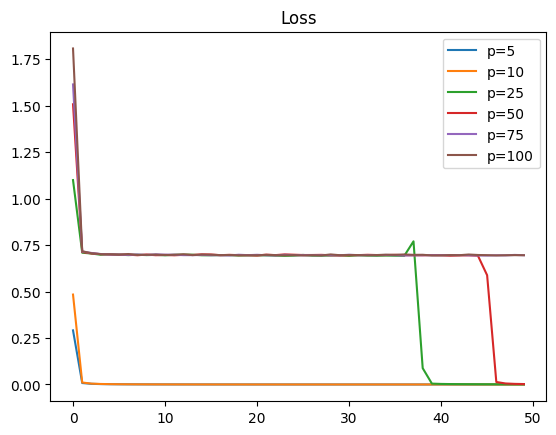

In [20]:
n = [5,10,25,50,75,100]

for i in range(len(n)):
    p=n[i]
    x = np.eye(p+1)[p-1]
    y = np.eye(p+1)[p]
    input = generate_seq(x,y,p,1000)
    np.random.shuffle(input)
    X_train = input[:,:-1,:]
    Y_train = input[:,-1,:]
    RNN_model = Sequential()
    RNN_model.add(SimpleRNN(50, input_shape=(p, p+1)))
    RNN_model.add(Dense(p+1, activation='softmax'))
    RNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    RNN_model.fit(X_train, Y_train,20, epochs=50, verbose=1)
    # plot loss during training
    plt.plot(RNN_model.history.history['loss'], label='p='+str(p))
    plt.legend()
    plt.title('Loss')
plt.show()

Epoch 1/50
100/100 [==============================] - 2s 5ms/step - loss: 0.7061 - accuracy: 0.9545
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 9.7715e-04 - accuracy: 1.0000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 5.8894e-04 - accuracy: 1.0000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 4.0380e-04 - accuracy: 1.0000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 2.9844e-04 - accuracy: 1.0000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3167e-04 - accuracy: 1.0000
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 1.8620e-04 - accuracy: 1.0000
Epoch 9/50
100/100 [==============================] - 0s 4ms/step - loss: 1.5355e-04 - accuracy: 1.0000
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - los

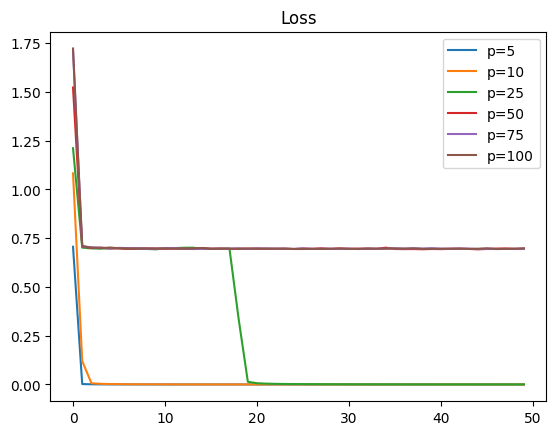

In [22]:
n = [5,10,25,50,75,100]

for i in range(len(n)):
    p=n[i]
    x = np.eye(p+1)[p-1]
    y = np.eye(p+1)[p]
    input = generate_seq(x,y,p,1000)
    np.random.shuffle(input)
    X_train = input[:,:-1,:]
    Y_train = input[:,-1,:]
    LSTM_model = Sequential()
    LSTM_model.add(LSTM(50, input_shape=(p, p+1)))
    LSTM_model.add(Dense(p+1, activation='softmax'))
    LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    LSTM_model.fit(X_train, Y_train,20, epochs=50, verbose=1)
    # plot loss during training
    plt.plot(LSTM_model.history.history['loss'], label='p='+str(p))
    plt.legend()
    plt.title('Loss')
plt.show()

##### Architecture of RNN
- Number of hidden layers: 1
- Number of hidden units: 50
- Number of input features: p+1
- Number of output features: p+1
- Activation function: softmax
- Loss function: categorical cross entropy
- Optimizer: Adam
- Number of epochs: 100
- Batch size: 10
- Number of time steps: p
- Number of training samples: 2000

##### Architecture of LSTM
- Number of hidden layers: 1
- Number of hidden units: 50
- Number of input features: p+1
- Number of output features: p+1
- Activation function: softmax
- Loss function: categorical cross entropy
- Optimizer: Adam
- Number of epochs: 100
- Batch size: 20
- Number of time steps: p
- Number of training samples: 2000

##### Observations
- The RNN converges faster than LSTM.
- The RNN has a better accuracy than LSTM.